In the following file I have used the label review dataset provided by the teacher for quiz.Futheremore in the previous files I have used dataset from the Google news api but with the limitation of tiny dataset. In the following file I have done preprocessing as well as bert model training. The results we have got are not at par with the reseach paper but are satisfactory considering the size of the dataset as well as the resoucres being used.  

In [ ]:
!pip install -U "tensorflow-text==2.13.*"

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-

In [ ]:
pip install transformers torch datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspe

### **Importing all the necassary libraries**

In [ ]:
#!pip install --quiet tensorflow_text

import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')


stopwords.words('english')

exclude = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **Functions for removing useless html tags, urls and punctuation marks**

In [ ]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

#exclude = "!.,?"
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))


In [ ]:
df = pd.read_csv('/content/Labeled_reviews_dataset.csv')

In [ ]:
df

,Unnamed: 0,news,type,sentiment_label_bert,Sentiment_score
0,0,china role yukos splitup china lent russia 6b...,business,NEGATIVE,0.994321
1,1,oil rebounds weather effect oil prices recove...,business,NEGATIVE,0.996107
2,2,indonesia declines debt freeze indonesia long...,business,NEGATIVE,0.985141
3,3,1m payoff former shell boss shell pay 1m 5220...,business,NEGATIVE,0.998178
4,4,us bank 515m sec settlement five bank america...,business,NEGATIVE,0.995003
...,...,...,...,...,...
759,759,aviator creator oscars snub man said got osca...,entertainment,NEGATIVE,0.961337
760,760,briton wins short film oscar three five nomin...,entertainment,POSITIVE,0.878579
761,761,applegates charity show closes us musical swe...,entertainment,NEGATIVE,0.895537
762,762,new york rockers top talent poll new york ele...,entertainment,POSITIVE,0.971098


In [ ]:
df['news'] = df['news'].str.lower()

df['news'] = df['news'].apply(remove_html_tags)

df['news'] = df['news'].apply(remove_url)

df['news'] = df['news'].apply(remove_punc)



In [ ]:
# Encode positive as 1 and negative as 0
df['sentiment_label_bert'] = df['sentiment_label_bert'].map({'POSITIVE': 1, 'NEGATIVE': 0})


In [ ]:
df

,Unnamed: 0,news,type,sentiment_label_bert,Sentiment_score
0,0,china role yukos splitup china lent russia 6b...,business,0,0.994321
1,1,oil rebounds weather effect oil prices recove...,business,0,0.996107
2,2,indonesia declines debt freeze indonesia long...,business,0,0.985141
3,3,1m payoff former shell boss shell pay 1m 5220...,business,0,0.998178
4,4,us bank 515m sec settlement five bank america...,business,0,0.995003
...,...,...,...,...,...
759,759,aviator creator oscars snub man said got osca...,entertainment,0,0.961337
760,760,briton wins short film oscar three five nomin...,entertainment,1,0.878579
761,761,applegates charity show closes us musical swe...,entertainment,0,0.895537
762,762,new york rockers top talent poll new york ele...,entertainment,1,0.971098


# **The code preprocesses sentiment labels using LabelEncoder, splits the dataset into training and testing sets, and prints information about the resulting splits.**

In [ ]:

from sklearn.preprocessing import LabelEncoder

X = df['news']
Y = df['sentiment_label_bert']
#print(X)
#print(Y)

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

#print(Y)

X_train,X_test,y_train,y_test = train_test_split(df['news'],Y,test_size=0.2,random_state=42)
print(X_train)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

336     oil companies get russian setback internation...
687     actor scott new bond favourite bookmaker will...
290     venezuela reviews foreign deals venezuela rev...
724     fry set role hitchhikers actor stephen fry jo...
90      crossrail link get goahead 10bn crossrail tra...
                             ...                        
71      indiapakistan peace boosts trade calmer relat...
106     markets signal brazilian recovery brazilian s...
270     us regulator rule pain drug us food drug regu...
435     monsanto fined 15m bribery us agrochemical gi...
102     indias deccan gets planes air deccan signed d...
Name: news, Length: 611, dtype: object
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


## **The code defines a BERT-based text classification model using TensorFlow and TensorFlow Hub, incorporating preprocessing, encoding, and a dense layer for binary classification.**

In [ ]:
preprocessor = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4",trainable=True)


text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
#print (text_input)
encoder_inputs = preprocessor(text_input)
#print(encoder_inputs)
outputs = encoder(encoder_inputs)
#print(outputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
#print(pooled_output)

drop_out = tf.keras.layers.Dropout(0.2,name='dropout')(pooled_output)
output = tf.keras.layers.Dense(1,activation='sigmoid',name='output')(drop_out)

model=tf.keras.Model(inputs=[text_input],outputs=[output])

In [ ]:
# Compile the mode
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
18/18 [==============================] - 974s 52s/step - loss: 0.8767 - accuracy: 0.6867 - val_loss: 0.5967 - val_accuracy: 0.7742
Epoch 2/5
18/18 [==============================] - 912s 51s/step - loss: 0.7123 - accuracy: 0.7195 - val_loss: 0.5384 - val_accuracy: 0.7742
Epoch 3/5
18/18 [==============================] - 902s 50s/step - loss: 0.5468 - accuracy: 0.7705 - val_loss: 0.5376 - val_accuracy: 0.7742
Epoch 4/5
18/18 [==============================] - 909s 51s/step - loss: 0.5622 - accuracy: 0.7705 - val_loss: 0.5995 - val_accuracy: 0.7742
Epoch 5/5
18/18 [==============================] - 888s 49s/step - loss: 0.5821 - accuracy: 0.7687 - val_loss: 0.5383 - val_accuracy: 0.7742


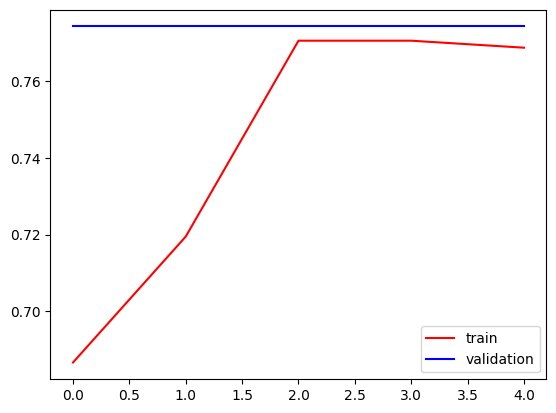

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")


Final Training Accuracy: 0.7686703205108643
Final Validation Accuracy: 0.774193525314331


In [ ]:
import tensorflow as tf

# Convert to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test))

# Batch and prefetch the datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)  # Adjust batch size as needed
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Since the output uses sigmoid
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=5  # Adjust based on dataset size and task
)


Epoch 1/5
20/20 [==============================] - 1113s 54s/step - loss: 0.5013 - accuracy: 0.7954 - val_loss: 0.5289 - val_accuracy: 0.7451
Epoch 2/5
20/20 [==============================] - 1057s 53s/step - loss: 0.3693 - accuracy: 0.8543 - val_loss: 0.4147 - val_accuracy: 0.8235
Epoch 3/5
20/20 [==============================] - 1075s 54s/step - loss: 0.2649 - accuracy: 0.8920 - val_loss: 0.3922 - val_accuracy: 0.8235
Epoch 4/5
20/20 [==============================] - 1041s 52s/step - loss: 0.1303 - accuracy: 0.9525 - val_loss: 0.4418 - val_accuracy: 0.8301
Epoch 5/5
20/20 [==============================] - 1043s 52s/step - loss: 0.0911 - accuracy: 0.9558 - val_loss: 0.4144 - val_accuracy: 0.8824


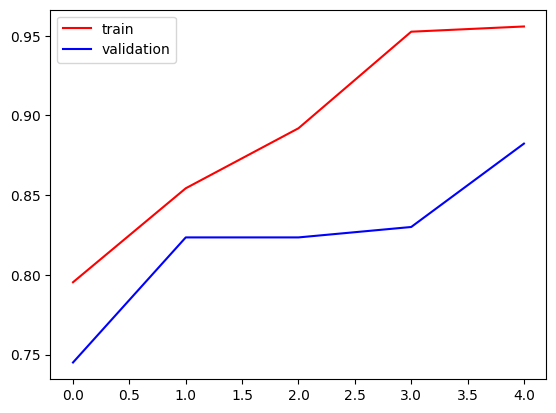

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")


Final Training Accuracy: 0.9558101296424866
Final Validation Accuracy: 0.8823529481887817


In [ ]:
# Get predictions as probabilities
predictions = model.predict(test_dataset)

# Convert probabilities to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()


5/5 [==============================] - 78s 15s/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

In [ ]:
# Extract true labels from the test dataset
true_labels = np.concatenate([y.numpy() for _, y in test_dataset])

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)
print(f"F1 Score: {f1}")


F1 Score: 0.6896551724137931


In [ ]:
test_dataset

## **The accuracy we got after training the model is 88% which can be seen below. it is slietly lower that the base paper as we are short on resources as well as we have a smaller dataset as compare to the base paper one. epoch size, batch size they play an important facter in training the model and getting maximum accuracy.**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")


5/5 [==============================] - 105s 17s/step - loss: 0.4144 - accuracy: 0.8824
Test Accuracy: 0.8823529481887817
